In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Initially i decided to import sales.csv file because I am going to analyze the sales data to see the demand for each product. 

In [2]:
#import dataset
salesdf = pd.read_csv('../Dataset/sales.csv')
salesdf.head(5)

,Unnamed: 0,date,item_id,quantity,price_base,sum_total,store_id
0,0,2023-08-04,293375605257,1.000,47.86,47.86,1
1,1,2023-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1
2,2,2023-08-04,daa46ef49b7a,0.822,379.00,311.54,1
3,3,2023-08-04,a3b49c1bf758,1.000,129.00,129.00,1
4,4,2023-08-04,ab611c5cef62,7.000,79.90,559.30,1


In [3]:
#drop unnecessary columns for my analysis
salesdf = salesdf.drop(columns=['Unnamed: 0','price_base','sum_total','store_id'],axis=1)

In [4]:
#verify the columns in the dataframe
salesdf.columns

Index(['date', 'item_id', 'quantity'], dtype='object')

In [5]:
salesdf.describe()

,quantity
count,7.432685e+06
mean,5.642398e+00
std,2.740466e+01
min,-5.000000e+02
25%,1.000000e+00
50%,2.000000e+00
75%,4.672000e+00
max,4.952000e+03


In [6]:
#call info to check the data types of each columns
salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7432685 entries, 0 to 7432684
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   date      object 
 1   item_id   object 
 2   quantity  float64
dtypes: float64(1), object(2)
memory usage: 170.1+ MB


In [7]:
#check the missing values in all columns
for i in salesdf.columns:
    m = salesdf[i].isnull().sum()
    print(f'Sum of missing values in column {i} is {m}')

Sum of missing values in column date is 0
Sum of missing values in column item_id is 0
Sum of missing values in column quantity is 0


In [8]:
#now i want to check the unique item_id having in the sales dataset
unqid = len(salesdf['item_id'].unique())
print(f'The number of total unique ids in the product set is {unqid}')


The number of total unique ids in the product set is 28182


There are considerably higher number of product items in the data set. Therefore, I will choose top five high value products for the analysis. 

In [9]:
#i made a mistake drop the columns at the initial. but now i want the price_base column to see the high value products. this is self-learning project. therefore i keep the mistake to memorize me. 
#hence i reimport data set here
#to computation efficiency i restart kernel from this cell again

df = pd.read_csv('../Dataset/sales.csv')
df.head(5)

,Unnamed: 0,date,item_id,quantity,price_base,sum_total,store_id
0,0,2023-08-04,293375605257,1.000,47.86,47.86,1
1,1,2023-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1
2,2,2023-08-04,daa46ef49b7a,0.822,379.00,311.54,1
3,3,2023-08-04,a3b49c1bf758,1.000,129.00,129.00,1
4,4,2023-08-04,ab611c5cef62,7.000,79.90,559.30,1


In [10]:
#we will see high value top five products
top_items = df.groupby('item_id')['price_base'].max().sort_values(ascending=False).head(5)
top_items

item_id
33dd4df7022d    28999.9
be8613b521dc    19999.0
1471e5bdd11f    19890.0
79321e8badfb    18999.0
dee614a9ea4d    17990.0
Name: price_base, dtype: float64

In [11]:
high_val_items=['33dd4df7022d','be8613b521dc','1471e5bdd11f','79321e8badfb','dee614a9ea4d']

In [12]:
new_df = df[df['item_id'].isin(high_val_items)]
new_df.head()

,Unnamed: 0,date,item_id,quantity,price_base,sum_total,store_id
215860,215860,2023-09-25,79321e8badfb,2.0,18999.00,37998.00,1
462869,462869,2023-11-15,dee614a9ea4d,1.0,14990.90,14990.90,1
662896,662896,2023-12-27,be8613b521dc,2.0,18899.62,37799.23,1
664510,664510,2023-12-27,1471e5bdd11f,1.0,19890.00,19890.00,1
923896,923896,2024-02-19,33dd4df7022d,1.0,25690.00,25690.00,1


In [13]:
new_df.describe()

,Unnamed: 0,quantity,price_base,sum_total,store_id
count,4.700000e+01,47.000000,47.000000,47.000000,47.000000
mean,1.166974e+07,1.170213,18518.383404,21804.130000,2.063830
std,8.425578e+06,0.789032,7176.101737,11257.105401,1.292188
min,2.158600e+05,-1.000000,0.000000,-999.000000,1.000000
25%,1.643349e+06,1.000000,16295.410000,17990.000000,1.000000
50%,1.273750e+07,1.000000,19890.000000,19890.000000,1.000000
75%,1.990642e+07,1.000000,22560.450000,26240.000000,3.000000
max,2.129538e+07,5.000000,28999.900000,62970.000000,4.000000


The high value product selling frequency is very low. It means for the whole period the data collected, the first five high price products are sold 47 times. This is very low compared to the other products selling rate. Therefore, developing predictive model or the highest value products is less importatnt compared to the other products. Therefore, I decided to select high demanded top five products considering the past selling data.

In [14]:
#selecting the first five higher demand products
df['item_id'].value_counts().sort_values(ascending=False).head(5)

item_id
e5b2b6f57ea7    2571
2c007023f650    2570
23b18d1f7da9    2569
0973df3ff57f    2565
99d388c37359    2563
Name: count, dtype: int64

In [15]:
#get items into a list
demand_itms = df['item_id'].value_counts(ascending=False).head(5).index.tolist()
print(demand_itms)

['e5b2b6f57ea7', '2c007023f650', '23b18d1f7da9', '0973df3ff57f', '99d388c37359']


In [16]:
demand_df = df[df['item_id'].isin(demand_itms)]
demand_df.head()

,Unnamed: 0,date,item_id,quantity,price_base,sum_total,store_id
2238,2238,2023-08-04,23b18d1f7da9,47.000,31.83,1495.90,1
2812,2812,2023-08-04,0973df3ff57f,191.667,79.01,15143.73,1
3451,3451,2023-08-04,2c007023f650,77.000,19.70,1516.65,1
3878,3878,2023-08-04,99d388c37359,10.000,41.91,419.05,1
4403,4403,2023-08-04,e5b2b6f57ea7,206.000,21.92,4514.58,1


In [17]:
#check the statistical summary of selected data frame
demand_df.describe()

,Unnamed: 0,quantity,price_base,sum_total,store_id
count,1.283800e+04,12838.000000,12838.000000,12838.000000,12838.000000
mean,1.433462e+07,79.133114,47.181245,4363.080002,2.223477
std,6.459647e+06,87.782762,35.207842,8010.954869,0.995426
min,2.238000e+03,-3.000000,0.000000,-209.700000,1.000000
25%,1.284630e+07,23.000000,25.612500,768.025000,1.000000
50%,1.622898e+07,47.000000,33.220000,1812.605000,2.000000
75%,1.976626e+07,86.000000,49.810000,3813.315000,3.000000
max,2.173900e+07,870.317000,159.900000,103128.860000,4.000000


In [18]:
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12838 entries, 2238 to 7432095
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12838 non-null  int64  
 1   date        12838 non-null  object 
 2   item_id     12838 non-null  object 
 3   quantity    12838 non-null  float64
 4   price_base  12838 non-null  float64
 5   sum_total   12838 non-null  float64
 6   store_id    12838 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 802.4+ KB


Lets visualize now!

C:\Users\asus\AppData\Local\Temp\ipykernel_6840\820490452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_df["date"] = pd.to_datetime(demand_df["date"]).dt.date


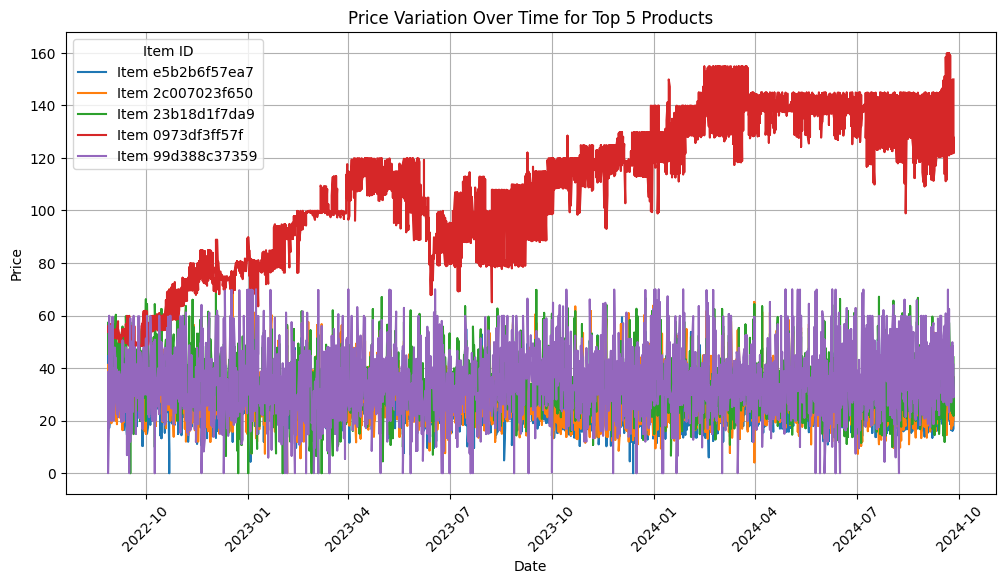

In [19]:
# convert 'date' column to datetime if it's not already
demand_df["date"] = pd.to_datetime(demand_df["date"]).dt.date

# sort by date for proper time-series plotting
demand_df = demand_df.sort_values(by=["date"])

# plot price variations over time for each product
plt.figure(figsize=(12, 6))

for item in demand_itms:
    subset = demand_df[demand_df["item_id"] == item]
    plt.plot(subset["date"], subset["price_base"], linestyle='-', label=f"Item {item}")

# labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price Variation Over Time for Top 5 Products")
plt.legend(title="Item ID")
plt.xticks(rotation=45)  # rotate x-axis labels for better readability
plt.grid(True)

The above visualization shows the price variation between two years. The item 0973df3ff57f price has increased compared to other products with a increasing trend. Other four item prices shown the seasonal pattern but not having the observable trend. We can superimpose the plot taking a one month data.

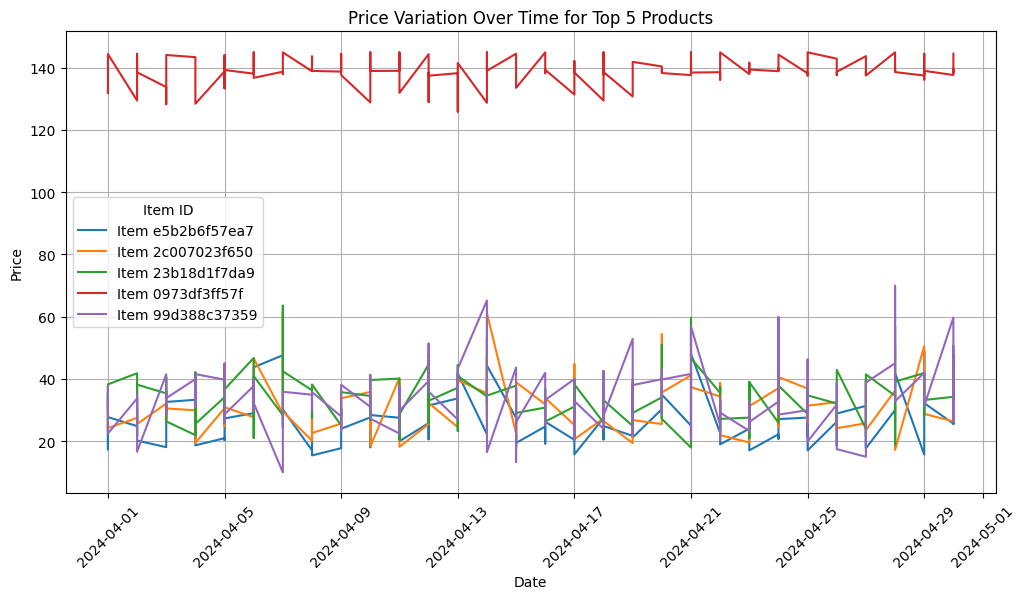

In [20]:
demand_df["date"] = pd.to_datetime(demand_df["date"])
month_df = demand_df[demand_df['date'].dt.to_period('M')=='2024-04']

# sort by date for proper time-series plotting
month_df = month_df.sort_values(by=["date"])

# plot price variations over time for each product
plt.figure(figsize=(12, 6))

for item in demand_itms:
    subset = month_df[month_df["item_id"] == item]
    plt.plot(subset["date"], subset["price_base"], linestyle='-', label=f"Item {item}")

# labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price Variation Over Time for Top 5 Products")
plt.legend(title="Item ID")
plt.xticks(rotation=45)  # rotate x-axis labels for better readability
plt.grid(True)

Above line chart is little confusing. It shows that there is more than one base_price per product within a day. It is possible because the product price does not always fixed per day. It can have several prices within day. To go deep analysis, this data set does not have the time vs prices. Therefore, I have to take average selling price per day.

In [21]:
#the finding of price variationwithin a day is proving the table below.
month_df[month_df['item_id']=='23b18d1f7da9']

,Unnamed: 0,date,item_id,quantity,price_base,sum_total,store_id
4044082,13776508,2024-04-01,23b18d1f7da9,20.0,23.47,469.33,2
6433112,20740017,2024-04-01,23b18d1f7da9,28.0,35.50,993.94,4
1139990,1139990,2024-04-01,23b18d1f7da9,86.0,31.39,2699.76,1
5232266,18417486,2024-04-01,23b18d1f7da9,85.0,38.24,3250.61,3
6438260,20745165,2024-04-02,23b18d1f7da9,30.0,41.81,1254.36,4
...,...,...,...,...,...,...,...
1286390,1286390,2024-04-29,23b18d1f7da9,57.0,33.24,1894.46,1
4099581,13832007,2024-04-30,23b18d1f7da9,27.0,34.23,924.18,2
1291401,1291401,2024-04-30,23b18d1f7da9,73.0,35.25,2573.20,1
5264842,18450062,2024-04-30,23b18d1f7da9,28.0,47.41,1327.36,3


In [22]:
#create new dataframe using the average price per day 
df_avg_month = month_df.groupby(['date','item_id'])['price_base'].mean().reset_index()
df_avg_month.head(10)

,date,item_id,price_base
0,2024-04-01,0973df3ff57f,135.6575
1,2024-04-01,23b18d1f7da9,32.1500
2,2024-04-01,2c007023f650,27.8425
3,2024-04-01,99d388c37359,30.5350
4,2024-04-01,e5b2b6f57ea7,23.5000
5,2024-04-02,0973df3ff57f,135.4375
6,2024-04-02,23b18d1f7da9,33.4075
7,2024-04-02,2c007023f650,27.8250
8,2024-04-02,99d388c37359,27.7200
9,2024-04-02,e5b2b6f57ea7,23.6475


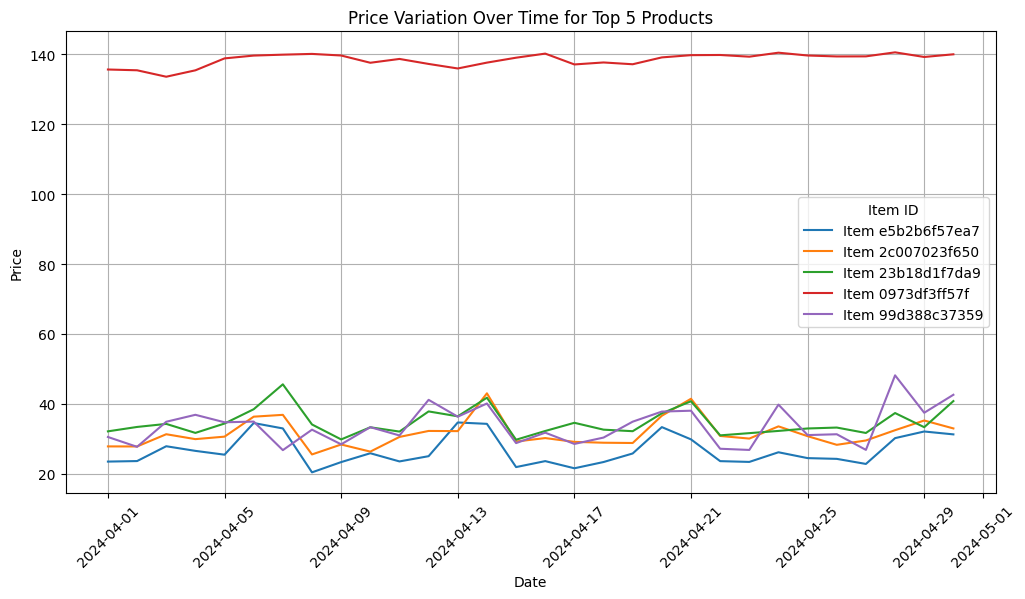

In [23]:
# plot price variations over time for each product
plt.figure(figsize=(12, 6))

for item in demand_itms:
    subset = df_avg_month[df_avg_month["item_id"] == item]
    plt.plot(subset["date"], subset["price_base"], linestyle='-', label=f"Item {item}")

# labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price Variation Over Time for Top 5 Products")
plt.legend(title="Item ID")
plt.xticks(rotation=45)  # rotate x-axis labels for better readability
plt.grid(True)

Now we can see clear price variation of each product day by day. This transformation should be carried on the whole data set.

In [24]:
#we can visualize the quantities of each products sold daily basis
#lets group the data set by date, product and the quantity
qnty_df = month_df.groupby(['date','item_id'])['quantity'].sum().reset_index()
qnty_df

,date,item_id,quantity
0,2024-04-01,0973df3ff57f,683.003
1,2024-04-01,23b18d1f7da9,219.000
2,2024-04-01,2c007023f650,309.000
3,2024-04-01,99d388c37359,99.000
4,2024-04-01,e5b2b6f57ea7,670.000
...,...,...,...
145,2024-04-30,0973df3ff57f,618.718
146,2024-04-30,23b18d1f7da9,159.000
147,2024-04-30,2c007023f650,189.000
148,2024-04-30,99d388c37359,80.000


In [25]:
#i wanted to cross check my previous code
month_df[month_df['date']=='2024-04-01'][month_df['item_id']=='99d388c37359']['quantity'].sum()

C:\Users\asus\AppData\Local\Temp\ipykernel_6840\761352659.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  month_df[month_df['date']=='2024-04-01'][month_df['item_id']=='99d388c37359']['quantity'].sum()


99.0

To visualize the quantity with the time and considering the each product, there are one numerical value and two categorical values. Hence, we can use clustered bar chart or stacked column bar chart. There are 150 columns if I choosed clustered bar chart. Only 30 column have include if I selected the stacked column. Therefore, I selected stacked column.

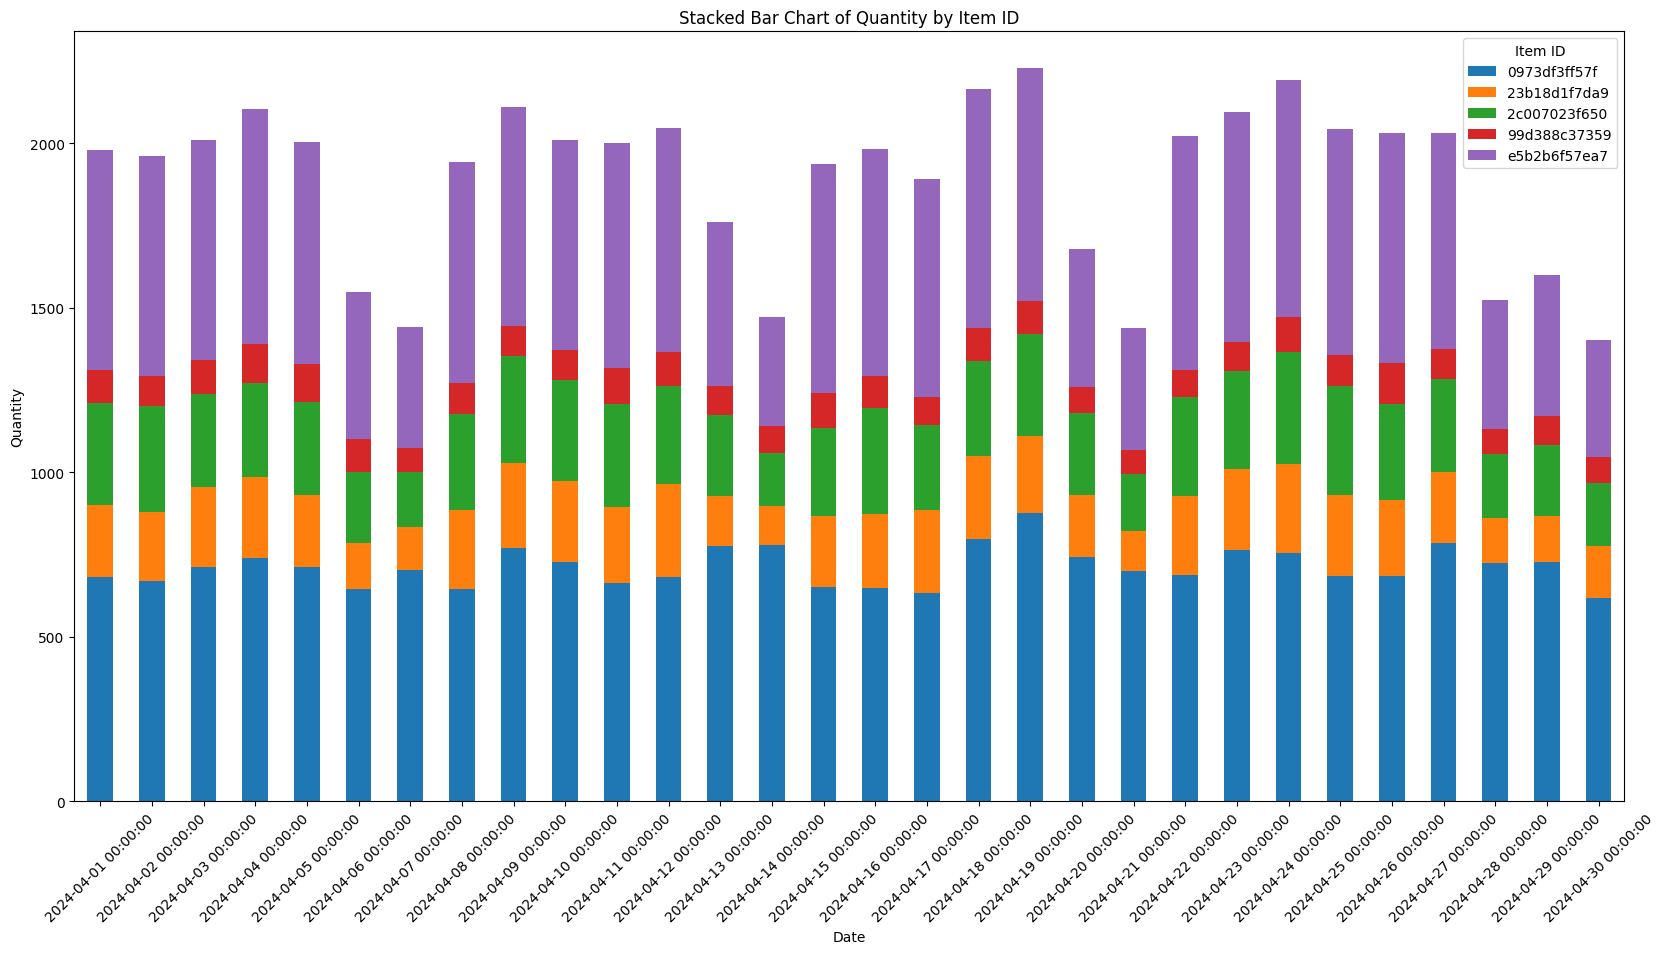

In [26]:
#plot stcked column chart
#need to create a pivot chart here
pivt_df = qnty_df.pivot(index='date',columns='item_id',values='quantity').fillna(0)
pivt_df.plot(kind='bar',stacked=True,figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Stacked Bar Chart of Quantity by Item ID")
plt.legend(title="Item ID")
plt.xticks(rotation=45)
plt.show()

We can see a seasonal pattenn of total sales when looking at the chart. It is regualarly occurs after seven days. To check the reason for that, we have to use the Day of the each bar. 

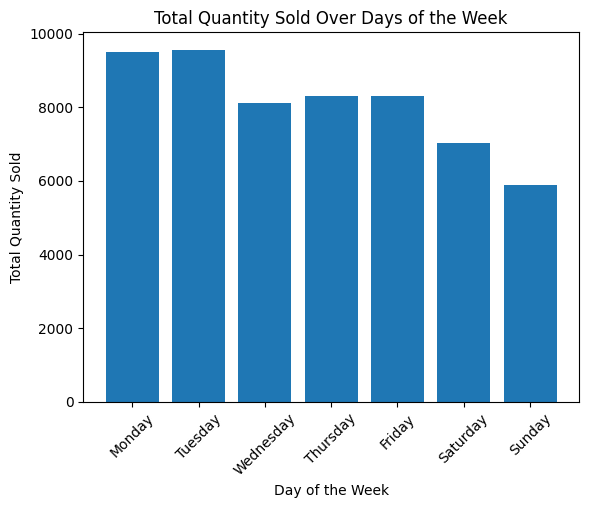

In [27]:
# total sales in April
qnty_df['date'] = qnty_df['date'].dt.day_name()  # convert to day names
total_sales = qnty_df.groupby('date')['quantity'].sum().reset_index()

# ensure days are ordered correctly (monday to sunday)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_sales['date'] = pd.Categorical(total_sales['date'], categories=days_order, ordered=True)
total_sales = total_sales.sort_values('date')

# plot a bar chart
plt.bar(total_sales['date'], total_sales['quantity'])
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold Over Days of the Week')
plt.xticks(rotation=45)
plt.show()

We can see that there is higher demand for our products in Monday and Tuesday. The lowest number of sales recorded in Sunday. This chart proves the previous observation which is seasonal market behavior to our products. We will plot the whole data set. I am going to plot the price bahavior and number of sale quantties for selected first five products.

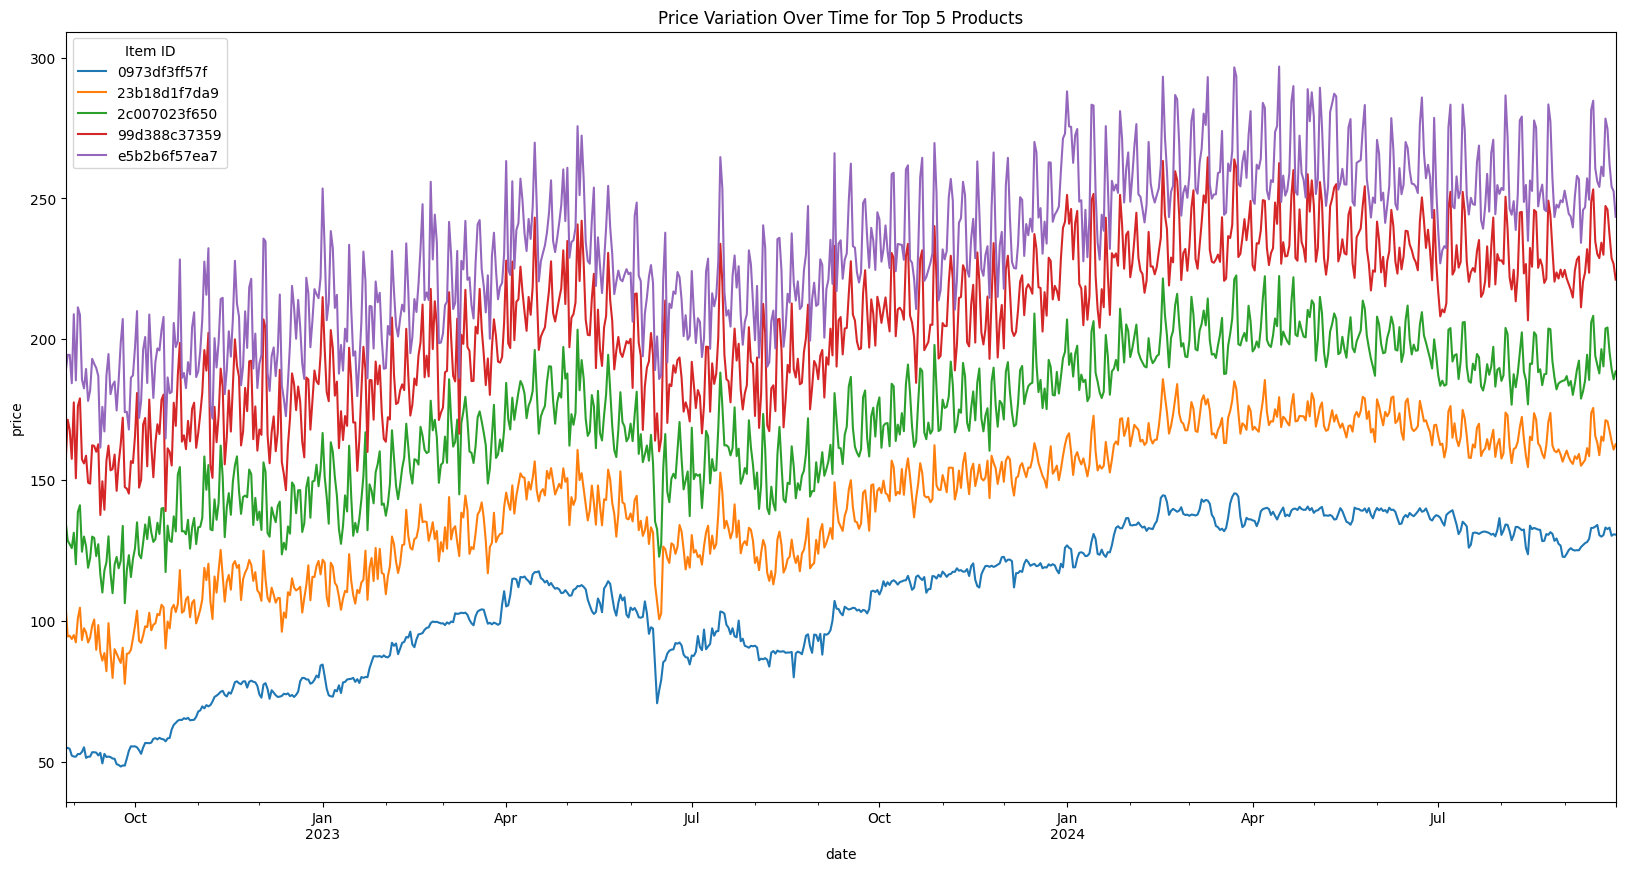

In [33]:
#consider whole data set
#plot price variation
demand_df_price=demand_df.groupby(['date','item_id'])['price_base'].mean().reset_index()
pivot_df=demand_df_price.pivot(index='date',columns='item_id',values='price_base').fillna(0)
pivot_df.plot(kind='line',stacked=True,figsize=(20,10))
plt.xlabel('date')
plt.ylabel('price')
plt.title('Price Variation Over Time for Top 5 Products')
plt.legend(title='Item ID')

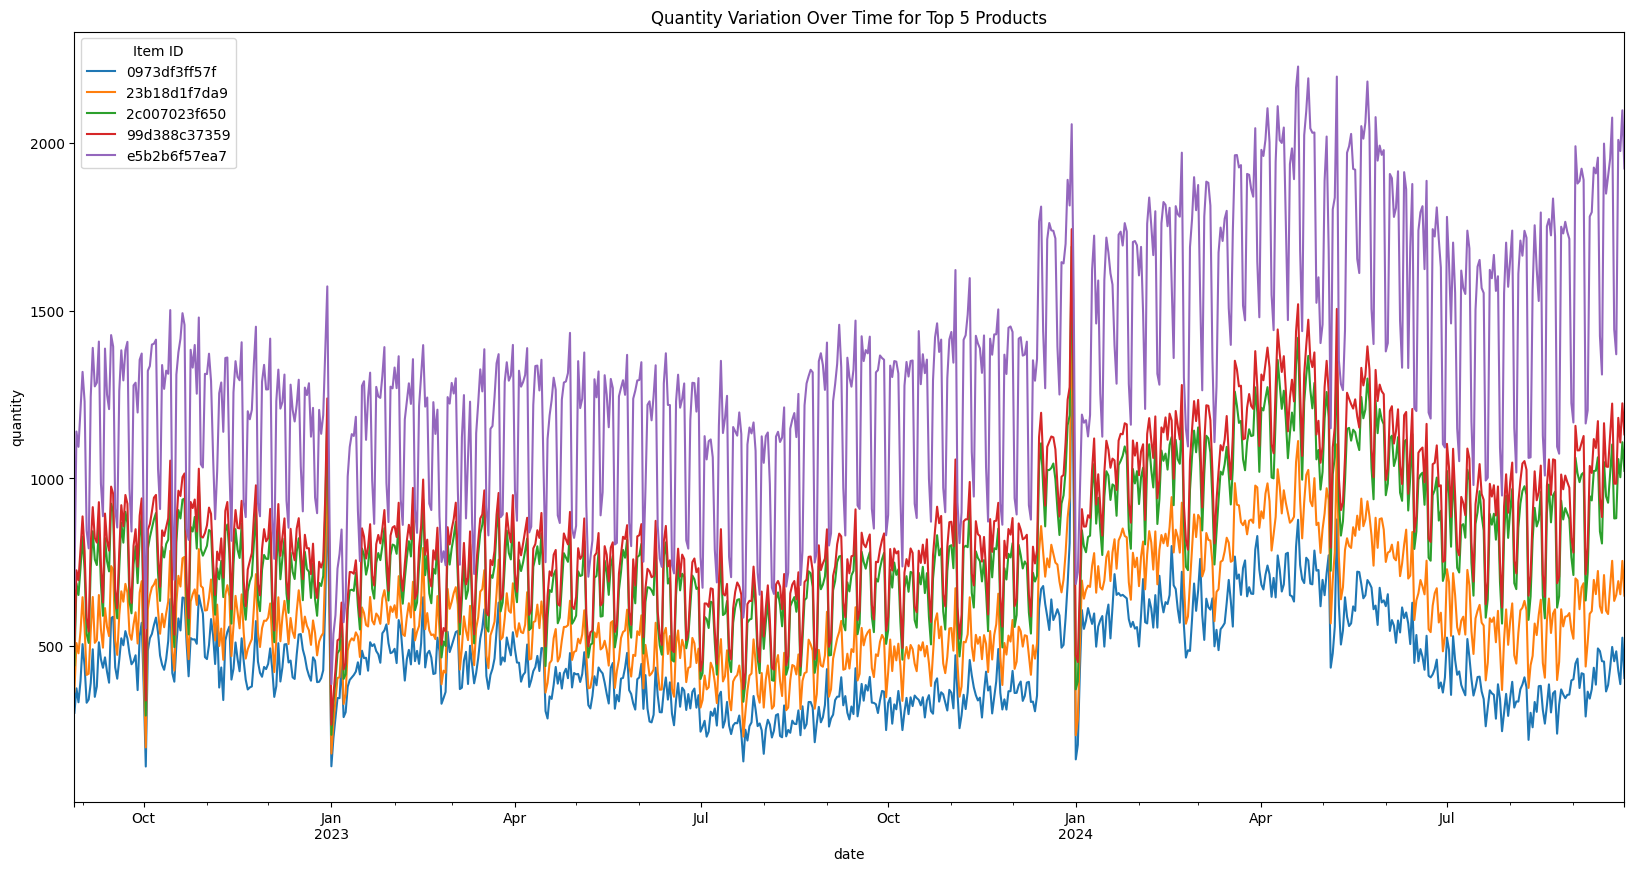

In [34]:
#plot quantity variation
demand_df_qty=demand_df.groupby(['date','item_id'])['quantity'].sum().reset_index()
pivot_df_qty=demand_df_qty.pivot(index='date',columns='item_id',values='quantity').fillna(0)
pivot_df_qty.plot(kind='line',stacked=True,figsize=(20,10))
plt.xlabel('date')
plt.ylabel('quantity')
plt.title('Quantity Variation Over Time for Top 5 Products')
plt.legend(title='Item ID')

we can see seasonal and cyclic pattern in the visualization. The price chart has trend but in the  sales chart does not show clear trend. But the amount sold in 2024 is increased quite compared to 2023. We can develop a predictive model for price and demand for each product using the demand_df_price and demand_df_qty data sets. Hence, I save both data frames separately to develop my machine learning model.

In [37]:
#save data frames
demand_df_price.to_csv('cleaned_price_pred.csv',index=False)
demand_df_qty.to_csv('cleaned_qty_pred.csv',index=False)